## LAB 3: Convolutional Neural Network

ING5, Grp 2 | BASOCAK Axel &amp; PREHU Emma &amp; RATTON Lucas

### Part 1: Convolutional Neural Network (CNN)


1. Import libraries : Tensorflow and Matplotlib

In [20]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2.Download and prepare the dataset

=> We load the CIFAR10 dataset :

In [4]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


3.Normalize Pixel Values

In [5]:
# Pixels values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

4.Verify the data

In [6]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

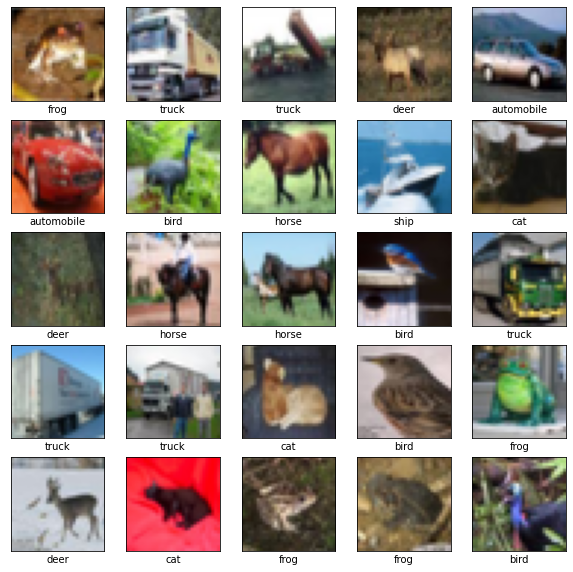

In [7]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

Q :Set the size of a figure to 100, Q: Plot first 32 images 

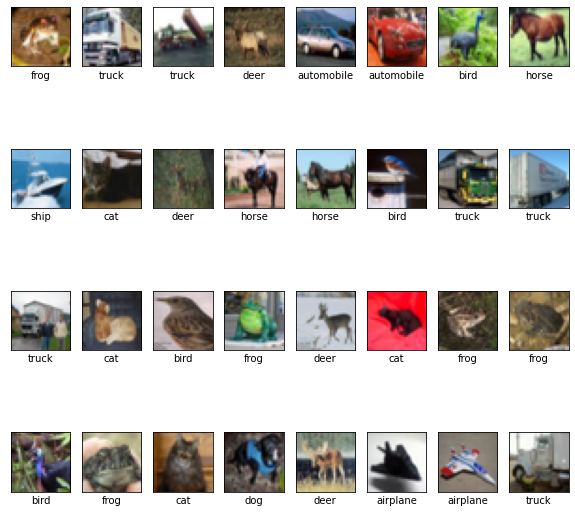

In [8]:
plt.figure(figsize = (10,10))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

5.Create the convolutional base

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

Q: Display the architecture of your model?

In [10]:
display(model)

=> The artichecture of our model is Sequential

Q: What is the output of every Conv2D and MaxPooling2D layer?

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


=> The ouput of Conv2D layer is : (None, 30, 30, 32)

=> The ouput of Max_Pooling2D layer is : (None, 15, 15, 32)

=> They are 3D shape tensor (height, width, depth)

6.Add Dense layers on top

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

=> For the layer (4, 4, 64), the outputs were razed into (1024).

7.Compile and train the model

In [14]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5190 - accuracy: 0.4427 - val_loss: 1.2564 - val_accuracy: 0.5476
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1680 - accuracy: 0.5857 - val_loss: 1.0797 - val_accuracy: 0.6219
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0167 - accuracy: 0.6417 - val_loss: 0.9853 - val_accuracy: 0.6549
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9202 - accuracy: 0.6758 - val_loss: 0.9364 - val_accuracy: 0.6668
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8578 - accuracy: 0.6989 - val_loss: 0.9366 - val_accuracy: 0.6798
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7951 - accuracy: 0.7221 - val_loss: 0.9055 - val_accuracy: 0.6902
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7496 - accuracy: 0.7373 - val_loss: 0.8770 -

Q: Analyze and interpret the result obtained

=> We have the value of loss training (loss) and testing (val_testing) for each epoch (1 to 10). The different between these two values is small and the final value goes down.

=> We have the value of accuracy training (accuracy) and testing (val_accuracy) for each epoch. The different between training and validation accuracy is not very large that means we won't have a situation of overfitting.

=> At the end of the 10 epochs, we have good scores for the loss and accuracy.

8.Evaluate the model

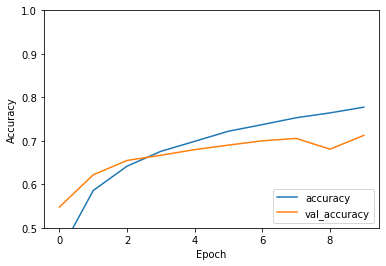

In [15]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

Q: Analyze the graph and interpret it.

We have the value of accuracy training (accuracy) and testing (val_accuracy) for each epoch. The gap between training and validation accuracy is an indication of overfitting. Here, the gap is not very large that means we won't have a situation of overfitting. Also, we can see the model is growing over epoch, that means the model is improving with experience. To finish, we can see it grows up faster at the beginning but from a time, the model grows slower, it's mean that it is not able to learn anymore.

In [16]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 2)

313/313 - 2s - loss: 0.8598 - accuracy: 0.7125


In [17]:
print(test_acc)

0.7124999761581421


With the Convolution Neural Network, we have a test accuracy equal to 70% that is a good score.

Q: What is the use of verbose while training the model?


The verbose means how we want to see the progression of training for each epoch. With verbose equals 0, nothing is display, when verbose equals to 1,the information are display during the model runs and to finish, with verbose equals to 2 the information are display at the end and we can see the number of epoch.